In [2]:
import pandas as pd
import seaborn as sns
import  matplotlib.pyplot as plt
import textwrap

df = pd.read_csv('https://storage.googleapis.com/hk4417_dse6000_hoassignment/Covid_Data.csv', encoding="ISO-8859-1")

In [ ]:
#TODO

#20 correlation statements

def vaccination_correlation(df):
  y = df[df['indicator'] == 'Vac_done']
  x = y.copy()
  x['percentage_vaccinated'] = (x['sample_subset']/x['sample_total']) *100 
  x['month'] = x['month'].astype('int')
  x['date'] = x['month'].astype('str') + '-'+ x['year'].astype('str')
  x['date'] = pd.to_datetime(x['date'], format='%m-%Y')
  percentage = x['percentage_vaccinated'].astype('category').cat.codes
  development = x['urban_rural'].astype('category').cat.codes

  vax_correlation = percentage.corr(development)
  return vax_correlation

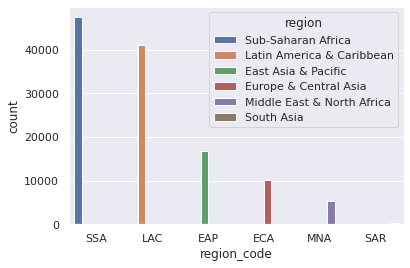

In [10]:
#TODO

# Meaningful plots of 5 different types
# Every plot should have a title and x/y axis should have legible labels without any label overlaps for full credit

def region_graph(df):
  frame_count = df[['region_code', 'region']]\
                .groupby('region_code')\
                .agg({'region' : 'count'})\
                .reset_index()
  frame_count.rename(columns={"region": "region_count"})
  frame_plot = df[['region', 'region_code']]
  frame_plot_graph = frame_count.join(frame_plot.set_index('region_code'),\
                                      on='region_code', how='inner', lsuffix='_count')\
                                      .sort_values(by='region_count', ascending=False)
  return frame_plot_graph

frame_plot = region_graph(df)

%matplotlib inline
sns.set(style="darkgrid")
ax = sns.countplot(x='region_code', hue='region', data=frame_plot)
sns.move_legend(ax, "upper right")
plt.show()

In [ ]:
#TODO

# At least 2 queries, like using select, group by, segmentation, etc., which does not produce charts but will bring out some meaningful results that you can articulate



In [ ]:
#TODO

# You should have a final conclusion, highlighting the main insights that you were able to derive from your analysis